In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd
import hvplot.pandas
import holoviews as hv
from distributed.utils import format_bytes, parse_bytes
from pathlib import Path


In [40]:
li=[]
li_fixed=[]
li_write=[]
f=Path('.').glob('pange-bench/results/chey*/2020-*/compute_study_2020*.csv')

for i in f:
    
    df_temp=dd.read_csv(i,dtype={'root':str}).compute()
    s=set(df_temp.operation)
    if ("openfile" in s) & ("writefile" not in s):
        #print("fixed",s)
        li_fixed.append(df_temp)
    elif ("writefile" in s) & ('deletefile' not in s):
        li_write.append(df_temp)
    else:
        #print(df_temp)
        li.append(df_temp)
print(len(li_fixed))
print(len(li_write))
print(len(li))


dfc=pd.concat(li_fixed)
dfc['throughput_Mbps'] = 460.85*1000/dfc.runtime
dfc['chunk_size'] = dfc['chunk_size'].map(lambda x: format_bytes(parse_bytes(x)))
dfc['dataset_size'] = dfc['dataset_size'].map(lambda x: format_bytes(parse_bytes(x)))
dfc['dataset_size_num']=dfc.dataset_size.map(lambda x: parse_bytes(x))

dfc['chunk_size (MB)']=dfc.chunk_size.map(lambda x: parse_bytes(x))/1e+6
dfc[(dfc.io_format=='zarr' )& (dfc.filesystem=='s3')&(dfc.operation=='readfile')&(dfc.chunk_size=='192.00 MB')]

362
31
70


,operation,fixed_totalsize,chunk_size,chunk_per_worker,dataset_size,worker_per_node,threads_per_worker,num_nodes,chunking_scheme,io_format,filesystem,root,machine,maxmemory_per_node,maxcore_per_node,spil,runtime,throughput_Mbps,dataset_size_num,chunk_size (MB)
3,readfile,True,192.00 MB,10,57.65 GB,10,1,3,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,222.807400,2068.378344,57650000000,192.0
3,readfile,True,192.00 MB,10,57.65 GB,10,1,3,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,231.235558,1992.989328,57650000000,192.0
3,readfile,True,192.00 MB,10,19.27 GB,10,1,1,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,722.234208,638.089410,19270000000,192.0
3,readfile,True,192.00 MB,10,230.42 GB,10,1,12,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,84.407044,5459.852353,230420000000,192.0
3,readfile,True,192.00 MB,10,115.21 GB,10,1,6,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,142.403597,3236.224425,115210000000,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,readfile,True,192.00 MB,10,230.42 GB,10,1,12,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,79.273012,5813.453861,230420000000,192.0
3,readfile,True,192.00 MB,10,230.42 GB,10,1,12,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,93.718575,4917.381652,230420000000,192.0
3,readfile,True,192.00 MB,10,38.46 GB,10,1,2,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,314.014679,1467.606549,38460000000,192.0
3,readfile,True,192.00 MB,10,57.65 GB,10,1,3,auto,zarr,s3,pangeo-bench-local/test1,cheyenne,109gb,36,False,244.695880,1883.358229,57650000000,192.0


In [53]:
chunk_size_list = ['64.00MB','128.00 MB', '192.00MB',  '256.00 MB', '384.00MB', '512.00MB', '786MB' ]
d1 = dfc[dfc['io_format'] == 'netcdf']
d2 = dfc[dfc['io_format'] == 'zarr']
d3 = dfc[dfc['operation'] == 'writefile']
d4 = dfc[dfc['operation'] == 'readfile']
d5 = dfc[dfc['operation'] == 'openfile']
d6 = dfc[(dfc['chunk_size'] == '256.00 MB') |(dfc['chunk_size'] == '384.00 MB')|(dfc['chunk_size'] == '768.00 MB')] 
d7 = dfc[(dfc['chunk_size'] != '1.02 GB')&(dfc['chunk_size'] != '256.00 MB')&(dfc['chunk_size'] != '512.00 MB')&(dfc['chunk_size'] != '128.00 MB')]

dd1={}

mode='readfile'
dd1['NetCDF POSIX '+mode] = d7[(d7['io_format'] == 'netcdf') & (d7['filesystem'] == 'posix') &(d7['operation'] == mode)&(d7['chunking_scheme']=='temporal')]
dd1['NetCDF S3 '+mode] = d7[(d7['io_format'] == 'netcdf') & (d7['filesystem'] == 's3') &(d7['operation'] == mode)&(d7['chunking_scheme']=='temporal')]
dd1['Zarr POSIX '+mode] = d7[(d7['io_format'] == 'zarr') & (d7['filesystem'] == 'posix') &(d7['operation'] == mode)&(d7['chunking_scheme']=='temporal')]
dd1['Zarr S3 '+mode] = d7[(d7['io_format'] == 'zarr') & (d7['filesystem'] == 's3') &(d7['operation'] == mode)&(d7['chunking_scheme']=='temporal')]

df = pd.concat([d7])
#df = df.drop(df.index[df['operation'] == 'deletefile'])
df=df[(df['operation'] == mode)&(df['chunking_scheme']=='temporal')]



[num_nodes  chunk_size
 1          192.00 MB      5667.195760
            384.00 MB      5838.499983
            64.00 MB       4015.475547
            768.00 MB      5921.928727
 2          192.00 MB     11099.798483
            384.00 MB     11519.510317
            64.00 MB       7865.341011
            768.00 MB     11801.353983
 3          192.00 MB     15962.334360
            384.00 MB     16703.940808
            64.00 MB      11230.006794
            768.00 MB     16924.969538
 6          192.00 MB     29904.148410
            384.00 MB     31686.628646
            64.00 MB      18087.216840
            768.00 MB     30961.033551
 12         192.00 MB     48125.376103
            384.00 MB     53131.294052
            64.00 MB      28703.951049
            768.00 MB     53233.824331
 Name: throughput_Mbps, dtype: float64,
 num_nodes  chunk_size
 1          192.00 MB      9825.471969
            384.00 MB     10417.397403
            64.00 MB       6725.457504
            768.0

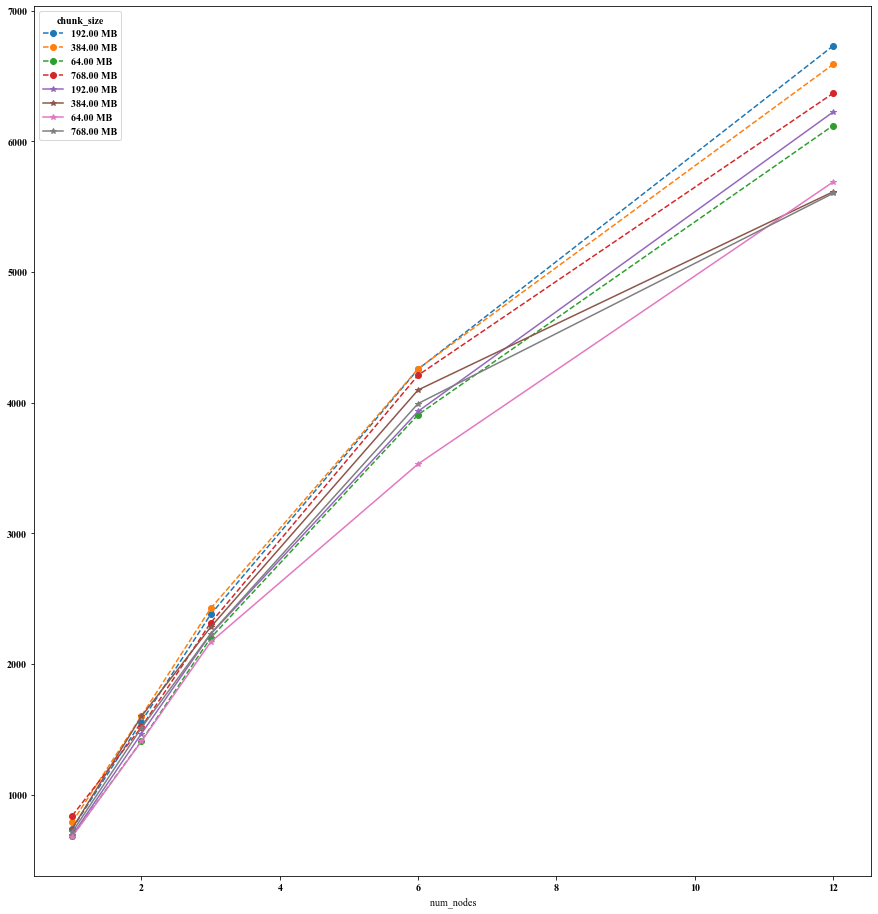

In [54]:
fig, ax = plt.subplots(figsize=(15,16))
dd1['NetCDF S3 '+mode].groupby(['num_nodes','chunk_size']).mean()['throughput_Mbps'].unstack().plot(ax=ax,ls='--',marker='o')
dd1['Zarr S3 '+mode].groupby(['num_nodes','chunk_size']).mean()['throughput_Mbps'].unstack().plot(ax=ax,marker='*')
z=dd1['Zarr POSIX '+mode].groupby(['num_nodes','chunk_size']).mean()['throughput_Mbps']
n=dd1['NetCDF POSIX '+mode].groupby(['num_nodes','chunk_size']).mean()['throughput_Mbps']
[z,n]



In [55]:
#df = get_renamed_df(dd)
#df3 = get_normalized_df(df1)
x='num_nodes'
y='runtime'
by=['chunk_size']
groupby=[ 'io_format']
dfplot = df.sort_values(x).reset_index()
    #clean_df = clean_df



dfplot = dfplot.drop(dfplot.index[dfplot.num_nodes > 16])

In [56]:
dfplot.hvplot.scatter(x=x,y=y,by=by,groupby=groupby, ylim=(0,750), xlim=(0,8), xticks=(1, 2, 3, 6))

:DynamicMap   [io_format]
   :NdOverlay   [chunk_size]
      :Scatter   [num_nodes]   (runtime)

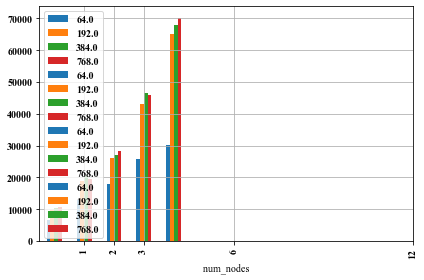

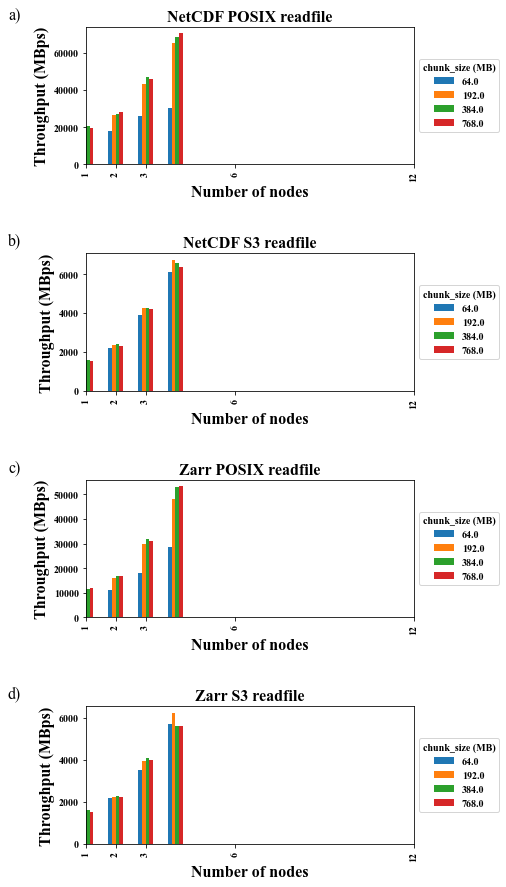

In [64]:

from matplotlib import rcParams

rcParams["font.family"] = 'Times New Roman'
rcParams['font.weight'] = 'bold'

font = {'family': 'Times New Roman',
        #'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

fig0, ax0 = plt.subplots()
fig1, axs = plt.subplots(nrows=4, ncols=1, figsize=(8, 13))
colormap = ['r', 'b', 'green', 'yellow', 'cyan', 'orange','gray', 'purple']

total_nbytes=460.85*1000
label_list=('a)', 'b)', 'c)', 'd)')
for (name, dd_one), color, ax1, label in zip(dd1.items(), colormap, axs.flat, label_list):
    for ax in [ax0, ax1]:
        temp=dd_one.groupby(['num_nodes','chunk_size (MB)']).mean()
        temp1=dd_one.groupby(['num_nodes','chunk_size (MB)']).agg(['std'])
        #temp2=temp['dataset_size_num']/1e+6/temp['runtime']
        
        temp2=temp['throughput_Mbps']
        
        temp2.unstack().plot(kind='bar',
                   ls="-",  ax=ax,xticks=(1,2,3,6,12))
        
      
       

    #ax1.grid()
    ax1.set_ylabel('Runtime (seconds)',fontdict=font)
    ax1.set_ylabel('Throughput (MBps)',fontdict=font)
    ax1.set_xlabel('Number of nodes', fontdict=font)
    ax1.set_title(name, fontdict=font)
    ax1.legend(loc='center left',title='chunk_size (MB)',bbox_to_anchor=(1, 0.5))
    ax1.set_xlim(1, 12)
    
    ax1.text(-0.2, 1.15, label, transform=ax1.transAxes,
         fontsize=16, fontweight='regular', va='top', ha='right')

ax0.grid()
ax0.legend(loc='upper left')

fig0.tight_layout()
fig1.tight_layout(pad=3.0)
plt.savefig('temp.png')

In [58]:
dfplot.hvplot.box(y, by=x,groupby=['operation', 'chunking_scheme','chunk_size','io_format', 'filesystem'])

:DynamicMap   [operation,chunking_scheme,chunk_size,io_format,filesystem]
   :BoxWhisker   [num_nodes]   (runtime)

In [232]:
def get_clean_df(df):
    weakmode=False
    if weakmode:
        groupby=[ 'operation','chunking_scheme','chunk_size (MB)', 'num_nodes','io_format','filesystem','chunk_size','dataset_size_num']

    else:
        groupby=[ 'operation','chunk_size (MB)', 'num_nodes','io_format','filesystem','chunk_size']
    clean_df = df.groupby(groupby).runtime.agg([ 'mean', 'median', 'std','count']).reset_index()
    clean_df['mean+std']=clean_df['mean'] + clean_df['std']
    clean_df['mean-std']=clean_df['mean'] - clean_df['std']
    if weakmode:
        clean_df['thruput+mean']=clean_df['dataset_size_num']/1e+6/clean_df['median']
        clean_df['thruput+mean+std']=clean_df['dataset_size_num']/1e+6/clean_df['mean-std']
        clean_df['thruput+mean-std']=clean_df['dataset_size_num']/1e+6/clean_df['mean+std']
    else:
        clean_df['thruput+mean']=460.85*1000/clean_df['median']
        
        clean_df['thruput+mean+std']=460.85*1000/clean_df['mean-std']
        clean_df['thruput+mean-std']=460.85*1000/clean_df['mean+std']
        clean_df['thruput+std']=clean_df['thruput+mean']-clean_df['thruput+mean-std']
    clean_df.sort_values(by=[ 'num_nodes','chunk_size (MB)']).reset_index()
    #clean_df = clean_df.drop(columns=[ 'mean', 'std'])

    return clean_df
#analyseddf = get_clean_df(df.loc[(df['operation']=='writefile')&(df.io_format=='zarr')&(df.filesystem=='s3')])
analyseddf=get_clean_df(df)
print('each tests were done ', analyseddf['count'].min() ,' to ', analyseddf['count'].max() ,'times')
print('in total we have done',  len(df)  , 'computations')
print('run time of each computasion varied from', analyseddf['thruput+mean'].min(),' to', analyseddf['thruput+mean'].max() ,'seconds' )

z=analyseddf[(analyseddf.io_format=='zarr')&(analyseddf.filesystem=='s3')]['thruput+mean'].reset_index()
n=analyseddf[(analyseddf.io_format=='netcdf')&(analyseddf.filesystem=='s3')]['thruput+mean'].reset_index()
n,z,n.subtract(z).div(n)
#n.count()
#analyseddf[(analyseddf.io_format=='zarr')&(analyseddf.filesystem=='posix')]
#analyseddf[(analyseddf.filesystem=='s3')]
#df[(df.io_format=='netcdf')&(df.filesystem=='s3')&(df.chunk_size=='768.00 MB')&(df.num_nodes==1)]
           

each tests were done  3  to  19 times
in total we have done 659 computations
run time of each computasion varied from 677.4857130442842  to 71844.72884236116 seconds


(    index  thruput+mean
 0       1    677.485713
 1       5   1379.472052
 2       9   2185.447916
 3      13   3912.480891
 4      17   6114.690372
 5      21    741.672462
 6      25   1560.713142
 7      29   2383.903200
 8      33   4280.265932
 9      37   6754.177694
 10     41    748.885841
 11     45   1610.087249
 12     49   2418.414991
 13     53   4308.219436
 14     57   6719.354831
 15     61    874.433877
 16     65   1563.104259
 17     69   2384.159803
 18     73   4282.580753
 19     77   6222.282126,
     index  thruput+mean
 0       3    699.519066
 1       7   1414.228108
 2      11   2172.375911
 3      15   3406.087245
 4      19   5580.752659
 5      23    683.278027
 6      27   1488.939897
 7      31   2241.599344
 8      35   3990.713192
 9      39   6143.574184
 10     43    728.686929
 11     47   1575.187229
 12     51   2281.829163
 13     55   4145.028333
 14     59   5643.656568
 15     63    683.381320
 16     67   1531.792030
 17     71   2264.879025

In [233]:
def get_normalized_df(df,key='median'):
    #normalize runtime
    dfnew = pd.DataFrame() 
    #chunking_scheme_list = set(df['chunking_scheme'])
    operation_list = set(df['operation'])
    chunk_size_list = set(df['chunk_size'])
    for operation in operation_list: 
        df1 = df.query('operation == "{operation}"'.format(operation = operation)).copy() 
        for chunk_size in chunk_size_list: 
                df2 = df1.query('chunk_size == "{chunk_size}"'.format(chunk_size = chunk_size)).copy() 
            #for chunking_scheme in chunking_scheme_list: 
                #seg = df2.query('chunking_scheme == "{chunking_scheme}"'.format(chunking_scheme = chunking_scheme)).copy()
                seg = df2.copy()
                seg['normalized'] = seg[key]
                #seg.normalized= seg.normalized/seg[seg.num_nodes == 1 ].normalized.min()
                tt= seg[seg.num_nodes == 1 ]
                norm=tt['median'].min()
                seg.normalized= seg.normalized/norm
                dfnew = pd.concat([dfnew,seg])
    return dfnew


In [234]:
df1 = get_normalized_df(analyseddf,key='median')
df1['normalized_median'] = df1.normalized
df1=df1.drop(columns=['normalized'])

In [235]:
df2 = get_normalized_df(df1,key='mean+std')
df2['normalized_mean+std'] = df2.normalized
df2=df2.drop(columns=['normalized'])
df3 = get_normalized_df(df2,key='mean-std')
df3['normalized_mean-std'] = df3.normalized
df3=df3.drop(columns=['normalized'])
df3[['num_nodes','io_format','filesystem','chunk_size','thruput+mean','std','count','thruput+std']]

,num_nodes,io_format,filesystem,chunk_size,thruput+mean,std,count,thruput+std
20,1,netcdf,posix,192.00 MB,9779.483168,1.007081,5,164.016908
21,1,netcdf,s3,192.00 MB,741.672462,18.371451,9,23.307662
22,1,zarr,posix,192.00 MB,5744.167796,6.948404,8,551.613921
23,1,zarr,s3,192.00 MB,683.278027,48.625226,12,43.152665
24,2,netcdf,posix,192.00 MB,18474.263929,0.595514,5,187.244487
...,...,...,...,...,...,...,...,...
75,6,zarr,s3,768.00 MB,4079.775499,9.992569,14,427.561757
76,12,netcdf,posix,768.00 MB,71844.728842,0.743769,3,9192.107616
77,12,netcdf,s3,768.00 MB,6222.282126,4.924548,6,282.493044
78,12,zarr,posix,768.00 MB,56416.389623,1.821260,11,13533.726892


In [276]:
def log_linear_plot(df, title_df,loglog=False, plot_kind='line', x='num_nodes', y='median', ylabel='Normalized runtime ', 
                    y1='thruput+std',
                    y2='thruput+mean+std',
                    by=['chunk_size'], subplots=True, groupby=[ 'io_format','filesystem'], 
                    ylim=(10, 7500),xlim=(0.8,12.2),xticks=(1, 2, 3, 6, 12), shared_axes=True,
                    figname='test',png=False,col=1):
    if loglog:
        title = f'{title_df} -- Log scale'
    else:
        title = f'{title_df}'
    legend = 'right'
    
    ylabel='Throughput (MBps)'
    xlabel='Number of nodes'
    

    def hook(plot, element):
        plot.handles['xaxis'].axis_label_text_font_style = 'bold'
        plot.handles['yaxis'].axis_label_text_font_style = 'bold'
        plot.handles['xaxis'].axis_label_text_font = 'times new roman' 
        plot.handles['yaxis'].axis_label_text_font = 'times new roman' 
        plot.handles['plot'].legend.label_text_font = "times new roman"
        plot.handles['plot'].title.text_font = "times new roman"
        plot.handles['plot'].plot_width = 500
        plot.handles['plot'].plot_height = 225
    



        
    if subplots:
        line = df.hvplot(x=x, y=y, by=by,
        groupby=groupby,
        height=400,width=500,
        loglog=loglog, 
        kind=plot_kind, title=title, xlabel=xlabel,ylabel=ylabel,
        dynamic=False, 
                         legend=legend, 
                         use_index=False,shared_axes=shared_axes,
        yaxis='left',
        #xticks=xticks,
                         
        fontsize={'xticks':12,'yticks':12,'ylabel':12, 'xlabel':12,'title':14,'legend':12 },

        xticks=[(1,1),(2, 2),(3, 3),(4, ' '), (5, ' '), (6, 6), (7, ' '),(8, ' '),(9, ' '), (10, ' '), (11, ' '), (12,12), (13, ' '), (14, ' '), (15, ' '),(16,16)],
       # yticks=(1.0,1.2,1.4,1.6,1.8,2.0),
        ylim=ylim,xlim=xlim).layout().cols(col)
        line1 = df.hvplot.scatter(x=x, y=y, by=by,
        groupby=groupby,
        height=400,width=500,
        loglog=loglog, 
        title=title, xlabel=xlabel,ylabel=ylabel,
        dynamic=False, 
                         legend=legend, 
                         use_index=False,shared_axes=shared_axes,
        yaxis='left',
        #xticks=xticks,
                         
        fontsize={'xticks':12,'yticks':12,'ylabel':12, 'xlabel':12,'title':14,'legend':12 },

        xticks=[(1,1),(2, 2),(3, 3),(4, ' '), (5, ' '), (6, 6), (7, ' '),(8, ' '),(9, ' '), (10, ' '), (11, ' '), (12,12), (13, ' '), (14, ' '), (15, ' '),(16,16)],
       # yticks=(1.0,1.2,1.4,1.6,1.8,2.0),
        ylim=ylim,xlim=xlim).layout().cols(col)
        area = df.hvplot.errorbars(x=x,y=y,yerr1=y1, by=by, alpha=0.2, 
                              groupby=groupby, loglog=loglog, 
                                      height=300,width=500,
                              stacked=False).opts(hooks=[hook]).layout().cols(1)


    else:
        line = df.hvplot(x=x, y=y, by=by,
                  groupby=groupby,height=300,width=500,
                  rot=45, loglog=loglog, 
                  kind=plot_kind,title=title, ylabel=ylabel,
                  dynamic=False, legend=legend,marker='*',
                  use_index=False,shared_axes=shared_axes,
                  ylim=ylim)
        
 
        
    fig= line*line1*area
    #* area
    if png: 
       
       hvplot.save(fig, figname)
    return fig

In [274]:
mode='readfile'
log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'netcdf')&(analyseddf.filesystem == 'posix')] ,'NetCDF POSIX read',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyennestrongnetcdfposix_2'+mode+'.png',
                png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)

In [273]:
#c=analyseddf[(analyseddf.operation == 'writefile')&(analyseddf.io_format == 'zarr')]['chunk_size']
log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'zarr')&(analyseddf.filesystem == 'posix')] ,'Zarr POSIX read',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyennestrongzarrposix_2'+mode+'.png',
                png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)

In [277]:
#c=analyseddf[(analyseddf.operation == 'writefile')&(analyseddf.io_format == 'zarr')]['chunk_size']
log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'netcdf')&(analyseddf.filesystem == 's3')] ,'NetCDF S3 read',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyennestrongnetcdfs3_2'+mode+'.png',
                png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)

In [278]:
#c=analyseddf[(analyseddf.operation == 'writefile')&(analyseddf.io_format == 'zarr')]['chunk_size']
log_linear_plot(analyseddf[(analyseddf.operation == mode)&(analyseddf.io_format == 'zarr')&(analyseddf.filesystem == 's3')] ,'Zarr S3 read',loglog=False, col=1,y='thruput+mean',groupby=['io_format','filesystem'],figname='cheyennestrongzarrs3_2'+mode+'.png',
                png=True)


:NdLayout   [io_format,filesystem]
   :Overlay
      .NdOverlay.I   :NdOverlay   [chunk_size]
         :Curve   [num_nodes]   (thruput+mean)
      .NdOverlay.II  :NdOverlay   [chunk_size]
         :Scatter   [num_nodes]   (thruput+mean)
      .NdOverlay.III :NdOverlay   [chunk_size]
         :ErrorBars   [num_nodes]   (thruput+mean,thruput+std)